# Pandas Plots
A fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Example # 2: Analyze the Titanic passenger data

In [2]:
titanic = pd.read_csv("data/titanic.csv");

#df.head() #default of 5 obs
titanic.head(2)
#df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
# find column names
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Pandas plot: wrapper around plt.plot()

In Pandas, the plot method on Series and DataFrame is just a simple wrapper around plt.plot():

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or ‘density’ for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

DataFrame + TAB to pull up:

In [ ]:
#titanic + 

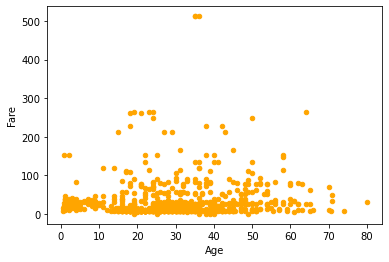

In [4]:
titanic.plot(kind="scatter", x="Age", y="Fare",color='orange')

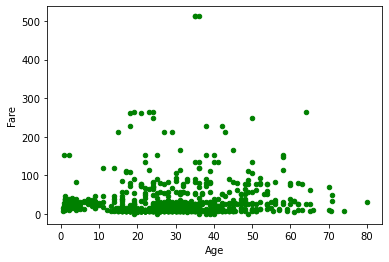

In [5]:
titanic.plot.scatter(x="Age", y="Fare",color='green')  # plt.scatter in matplotlib.pyplot
# the plot gets saved to 'titanic_scatter.png'
plt.savefig('titanic_scatter.png')

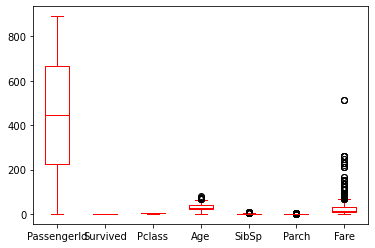

In [6]:
titanic.plot.box(color="red") # plt.boxplot in matplotlib.pyplot

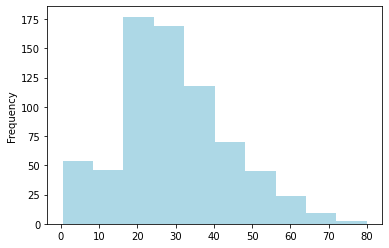

In [7]:
titanic["Age"].plot.hist(color="lightblue") # plt.hist in matplotlib.pyplot

      Age     Fare
0    22.0   7.2500
1    38.0  71.2833
2    26.0   7.9250
3    35.0  53.1000
4    35.0   8.0500
..    ...      ...
886  27.0  13.0000
887  19.0  30.0000
888   NaN  23.4500
889  26.0  30.0000
890  32.0   7.7500

[891 rows x 2 columns]


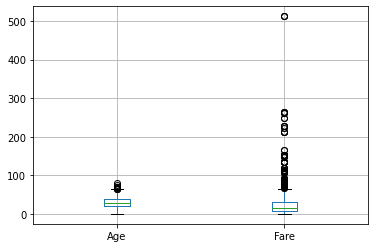

In [9]:
subset = titanic[["Age", "Fare"]]; print(subset)
subset.boxplot()  # require to be DataFrame, not Series
#subset.plot.box()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


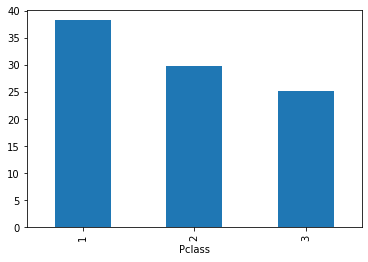

In [10]:
groupby_Pclass = titanic.groupby("Pclass")["Age"].mean()
print(groupby_Pclass)
groupby_Pclass.plot.bar()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


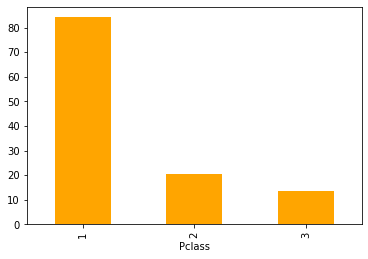

In [11]:
groupby_Pclass = titanic.groupby("Pclass")["Fare"].mean();
print(groupby_Pclass)
groupby_Pclass.plot.bar(color="orange")

              Age       Fare
Sex                         
female  27.915709  44.479818
male    30.726645  25.523893


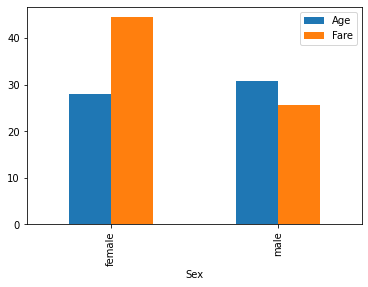

In [12]:
groupby_Sex = titanic.groupby('Sex')[['Age', 'Fare']].mean()
print(groupby_Sex)
groupby_Sex.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11bfe4700>,
      dtype=object)

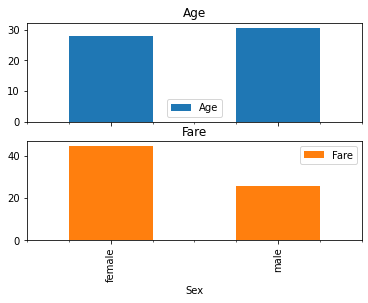

In [13]:
groupby_Sex = titanic.groupby('Sex')[['Age', 'Fare']].mean()
groupby_Sex.plot.bar(subplots = True)

              Age       Fare
Sex                         
female  27.915709  44.479818
male    30.726645  25.523893


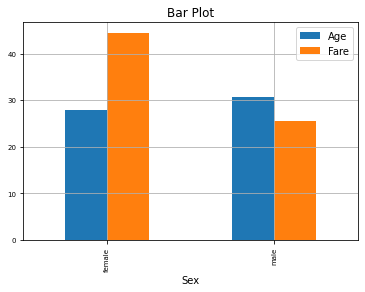

In [14]:
groupby_Sex = titanic.groupby('Sex')[['Age', 'Fare']].mean()
print(groupby_Sex) 
groupby_Sex.plot.bar(title = 'Bar Plot', grid = True, fontsize = 7)

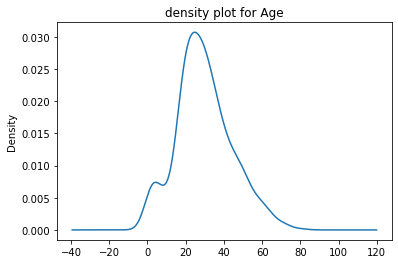

In [15]:
titanic["Age"].plot.kde(title= "density plot for Age")

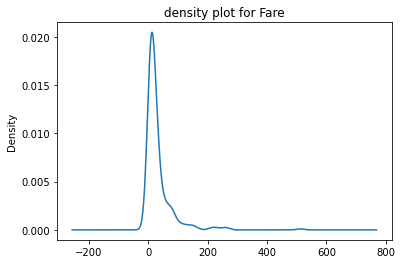

In [16]:
titanic["Fare"].plot.kde(title= "density plot for Fare")

Survived  Sex   
0         female    25.046875
          male      31.618056
1         female    28.847716
          male      27.276022
Name: Age, dtype: float64


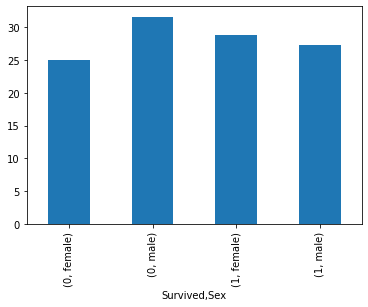

In [17]:
groupby_Sex = titanic.groupby(['Survived', "Sex"])["Age"].mean()
print(groupby_Sex)
groupby_Sex.plot.bar()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


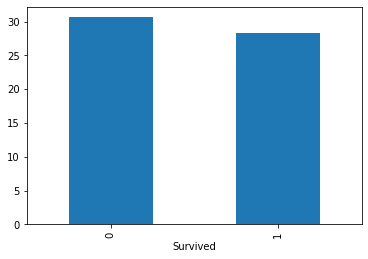

In [18]:
groupby_Sex = titanic.groupby(['Survived'])["Age"].mean()
print(groupby_Sex)
groupby_Sex.plot.bar()

In [19]:
grouped = titanic.groupby(['Survived', "Sex"])["Age"].describe()
grouped

count       mean        std   min    25%   50%    75%   max
Survived Sex                                                                
0        female   64.0  25.046875  13.618591  2.00  16.75  24.5  33.25  57.0
         male    360.0  31.618056  14.056019  1.00  21.75  29.0  39.25  74.0
1        female  197.0  28.847716  14.175073  0.75  19.00  28.0  38.00  63.0
         male     93.0  27.276022  16.504803  0.42  18.00  28.0  36.00  80.0

Survived  Sex   
0         female    AxesSubplot(0.125,0.125;0.775x0.755)
          male      AxesSubplot(0.125,0.125;0.775x0.755)
1         female    AxesSubplot(0.125,0.125;0.775x0.755)
          male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

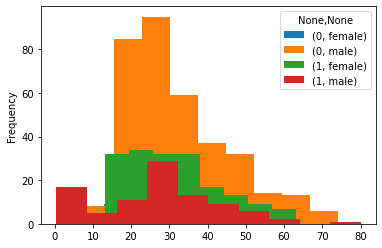

In [20]:
groupby_Sex = titanic.groupby(['Survived', "Sex"])["Age"]
groupby_Sex.plot.hist(legend=True)